# Homework 4
Tyler Estes  
CMAM  
4/3/20  

In [6]:
!jupyter nbconvert --to script hw4.ipynb --output hw4
!jupyter nbconvert --to pdf hw4.ipynb --output hw4

[NbConvertApp] Converting notebook hw4.ipynb to script
[NbConvertApp] Writing 6957 bytes to hw4.py


In [1]:
# libs
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

# interactive images
#%matplotlib widget 

# static inline images
%matplotlib inline 
# %config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

## Problem 1

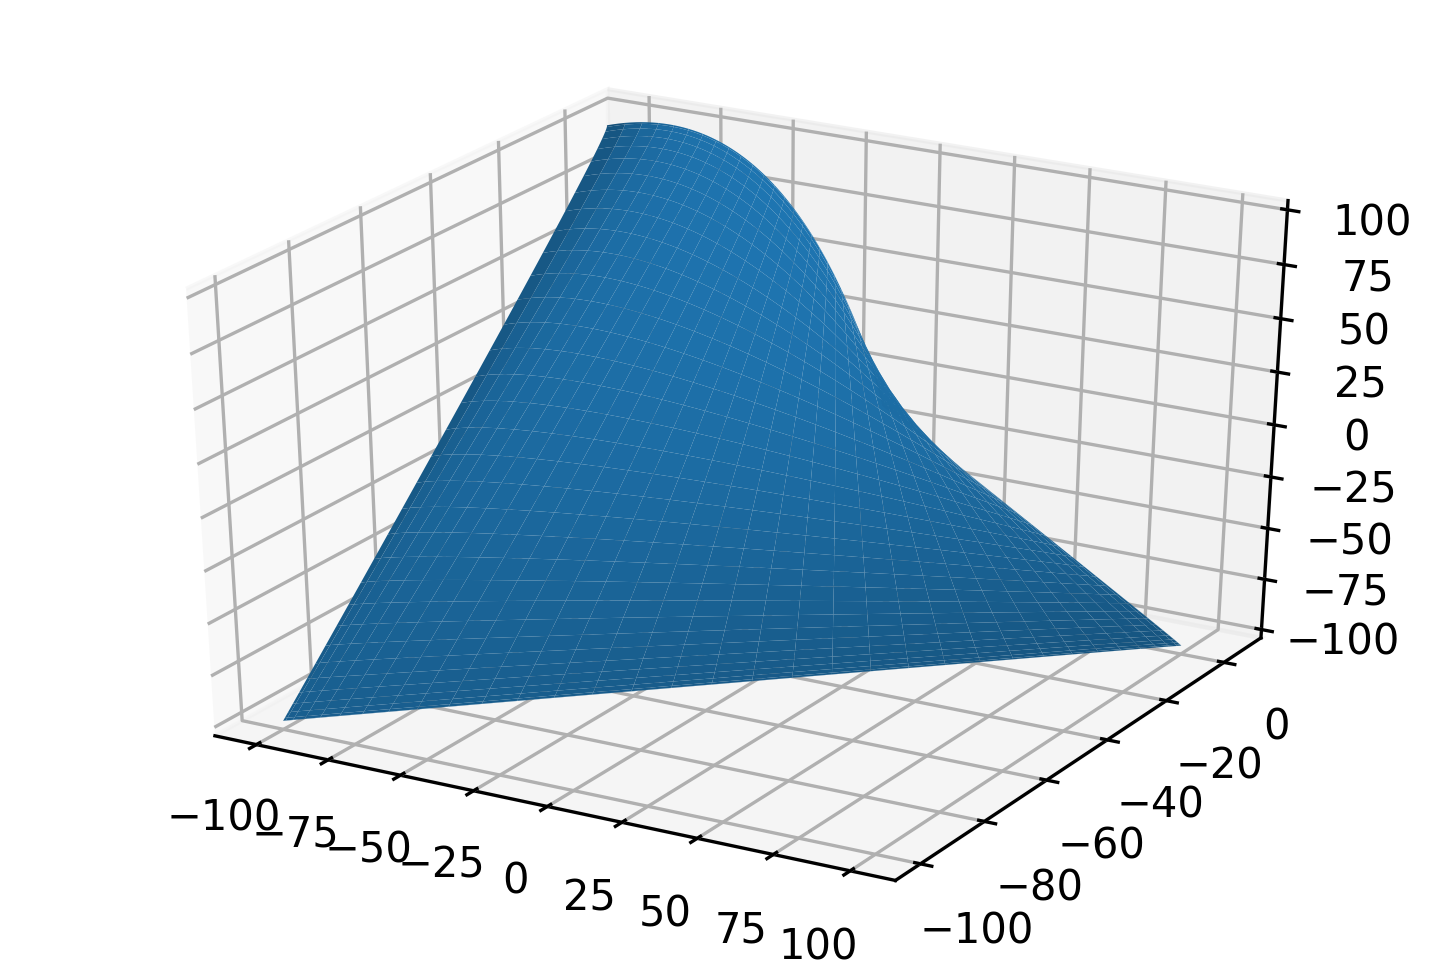

P[35, 45] = [-35.17035638 -36.96865506  14.04474091]
P[65, 75] = [ 44.81163633 -33.23017656 -68.77553984]
u[85, 95] = [-0.41033671  0.84291004  0.34803224]


In [3]:
# P, P^u, P^w, P^(uw)
P = np.array([
    [[-100, 0, 100], [-100, -100, -100]],
    [[100, -100, 100], [100, 0, -100]],
]) # indexable as P[0, 1] = P_sub01
PSupU = np.array([
    [[100, 100, 0], [1, 1, 0]],
    [[1, -1, 0], [1, -1, 0]],
]) 
PSupW = np.array([
    [[0, 10, -10], [0, -1, -1]],
    [[0, 1, -1], [0, -1, -1]],
]) 
PSupUW = np.array([
    [[0, 0, 0], [0.1, 0.1, 0.1]],
    [[0.1, -0.1, -0.1], [0, 0, 0]],
])

# M_H, B
MSubH = np.array([
    [2, -2, 1, 1], 
    [-3, 3, -2, -1],
    [0, 0, 1, 0],
    [1, 0, 0, 0],
])
B = np.array([
    [P[0, 0], P[0, 1], PSupW[0, 0], PSupW[0, 1]],
    [P[1, 0], P[1, 1], PSupW[1, 0], PSupW[1, 1]],
    [PSupU[0, 0], PSupU[0, 1], PSupUW[0, 0], PSupUW[0, 1]],
    [PSupU[1, 0], PSupU[1, 1], PSupUW[1, 0], PSupUW[1, 1]],
])

# U, W
start = 0
stop = 1
step = .01
u = np.arange(start, stop + step, step)
w = u.copy()
U = np.array([u**3, u**2, u**1, u**0]).transpose()
W = np.array([w**3, w**2, w**1, w**0]).transpose()

# P(u, w) = U * M_H * B * M_H^T * W^T
POut = np.zeros((len(u), len(w), 3))
for iu, uu in enumerate(u):
    for iw, ww in enumerate(w):
        for coord in range(3): # (x, y, z)
            POut[iu, iw, coord] = reduce(np.dot, [U[iu], MSubH, B[:, :, coord], MSubH.transpose(), W.transpose()[:, iw]])
            
# plot surface
fig = plt.figure(1)
ax = plt.axes(projection='3d')
ax.plot_surface(POut[:, :, 0], POut[:, :, 1], POut[:, :, 2])
plt.savefig(f"./problem{fig.number}.png", dpi=300)
plt.show()

# U^u, W^w
USupU = np.array([3*(u**2), 2*(u**1), 1*(u**0), 0*u]).transpose()
WSupW = np.array([3*(w**2), 2*(w**1), 1*(w**0), 0*w]).transpose()

# P^u, P^w
POutSupU = np.zeros((len(u), len(w), 3))
POutSupW = np.zeros((len(u), len(w), 3))
for iu, uu in enumerate(u):
    for iw, ww in enumerate(w):
        for coord in range(3): # (x, y, z)
            POutSupU[iu, iw, coord] = reduce(np.dot, [USupU[iu], MSubH, B[:, :, coord], MSubH.transpose(), W.transpose()[:, iw]])
            POutSupW[iu, iw, coord] = reduce(np.dot, [U[iu], MSubH, B[:, :, coord], MSubH.transpose(), WSupW.transpose()[:, iw]])

#        find point,     find point,     find unit normal vector
uu = (    0.35,           0.65,           0.85)
ww = (    0.45,           0.75,           0.95)

for uuu, www in zip(uu[:-1], ww[:-1]):
    u_indx, w_indx = [int(x*100) for x in (uuu, www)]
    print(f"P[{u_indx}, {w_indx}] = {POut[u_indx, w_indx]}")

u_indx, w_indx = [int(x*100) for x in (uu[-1], ww[-1])]
n = np.cross(POutSupU[u_indx, w_indx], POutSupW[u_indx, w_indx])
u = n / np.linalg.norm(n)
print(f"u[{u_indx}, {w_indx}] = {u}")

## Problem 2

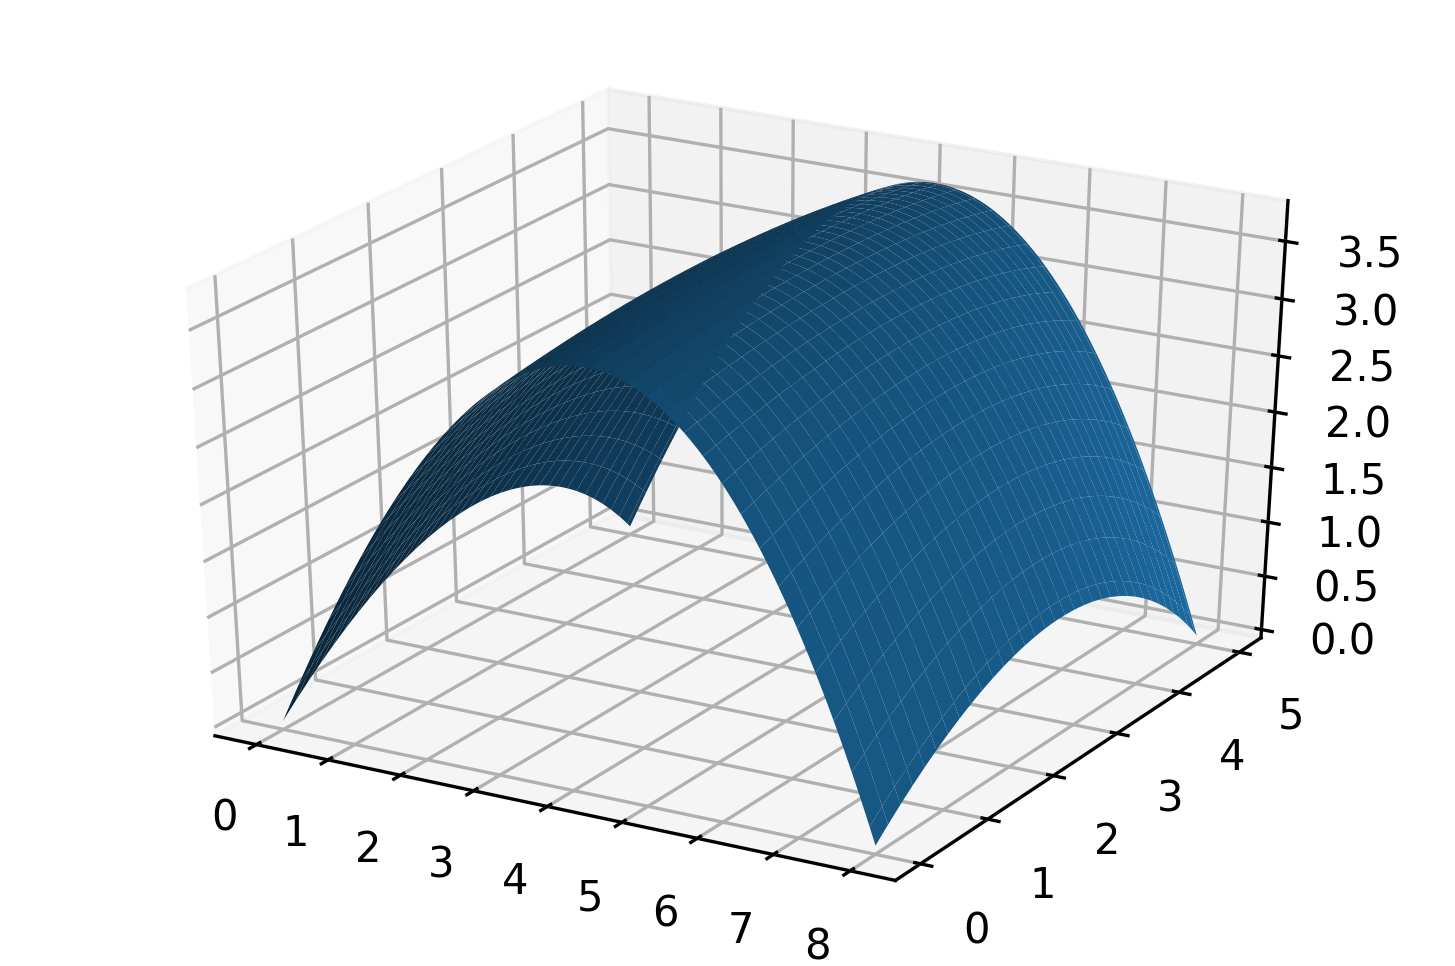

u[35, 45] = [-0.47214112 -0.01337773  0.88142146]


In [4]:
# P, M_(BU), M_(BW)
P = np.array([
    [[0, 0, 0], [0, 3, 2], [0, 5, 0]],
    [[2, 0, 3], [2, 3, 3], [2, 5, 3]],
    [[4, 0, 5], [4, 3, 5], [4, 5, 5]],
    [[6, 0, 4], [6, 3, 4], [6, 5, 4]],
    [[8, 0, 0], [8, 3, 2], [8, 5, 0]],
]) # indexable as P[0, 2] = P_sub02
MSubBSubU = np.array([
    [1, -4, 6, -4, 1],
    [-4, 12, -12, 4, 0],
    [6, -12, 6, 0, 0],
    [-4, 4, 0, 0, 0],
    [1, 0, 0, 0, 0],
])
MSubBSubW = np.array([
    [1, -2, 1],
    [-2, 2, 0],
    [1, 0, 0],
])

# U, W
start = 0
stop = 1
step = .01
u = np.arange(start, stop + step, step)
U = np.array([u**4, u**3, u**2, u**1, u**0]).transpose()
w = u.copy()
W = np.array([w**2, w**1, w**0]).transpose()

# P(u, w) = U * M_(BU) * P * M_(BW)^T * W^T
POut = np.zeros((len(u), len(w), 3))
for iu, uu in enumerate(u):
    for iw, ww in enumerate(w):
        for coord in range(3): # (x, y, z)
            POut[iu, iw, coord] = reduce(np.dot, [U[iu], MSubBSubU, P[:, :, coord], MSubBSubW.transpose(), W.transpose()[:, iw]])
            
# plot surface
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot_surface(POut[:, :, 0], POut[:, :, 1], POut[:, :, 2])
plt.savefig(f"./problem{fig.number}.png", dpi=300)
plt.show()

# U^u, W^w
USupU = np.array([4*(u**3), 3*(u**2), 2*(u**1), 1*(u**0), 0*u]).transpose()
WSupW = np.array([2*(w**1), 1*(w**0), 0*w]).transpose()

# P^u, P^w
POutSupU = np.zeros((len(u), len(w), 3))
POutSupW = np.zeros((len(u), len(w), 3))
for iu, uu in enumerate(u):
    for iw, ww in enumerate(w):
        for coord in range(3): # (x, y, z)
            POutSupU[iu, iw, coord] = reduce(np.dot, [USupU[iu], MSubBSubU, P[:, :, coord], MSubBSubW.transpose(), W.transpose()[:, iw]])
            POutSupW[iu, iw, coord] = reduce(np.dot, [U[iu], MSubBSubU, P[:, :, coord], MSubBSubW.transpose(), WSupW.transpose()[:, iw]])

#   find unit surface normal
uu = 0.35
ww = 0.45

u_indx, w_indx = [int(x*100) for x in (uu, ww)]
n = np.cross(POutSupU[u_indx, w_indx], POutSupW[u_indx, w_indx])
u = n / np.linalg.norm(n)
print(f"u[{u_indx}, {w_indx}] = {u}")


## Problem 3

P[0.5, 0.5] = [0.63060194 0.63060194 2.        ]
Radius error = 0.10819418755438781


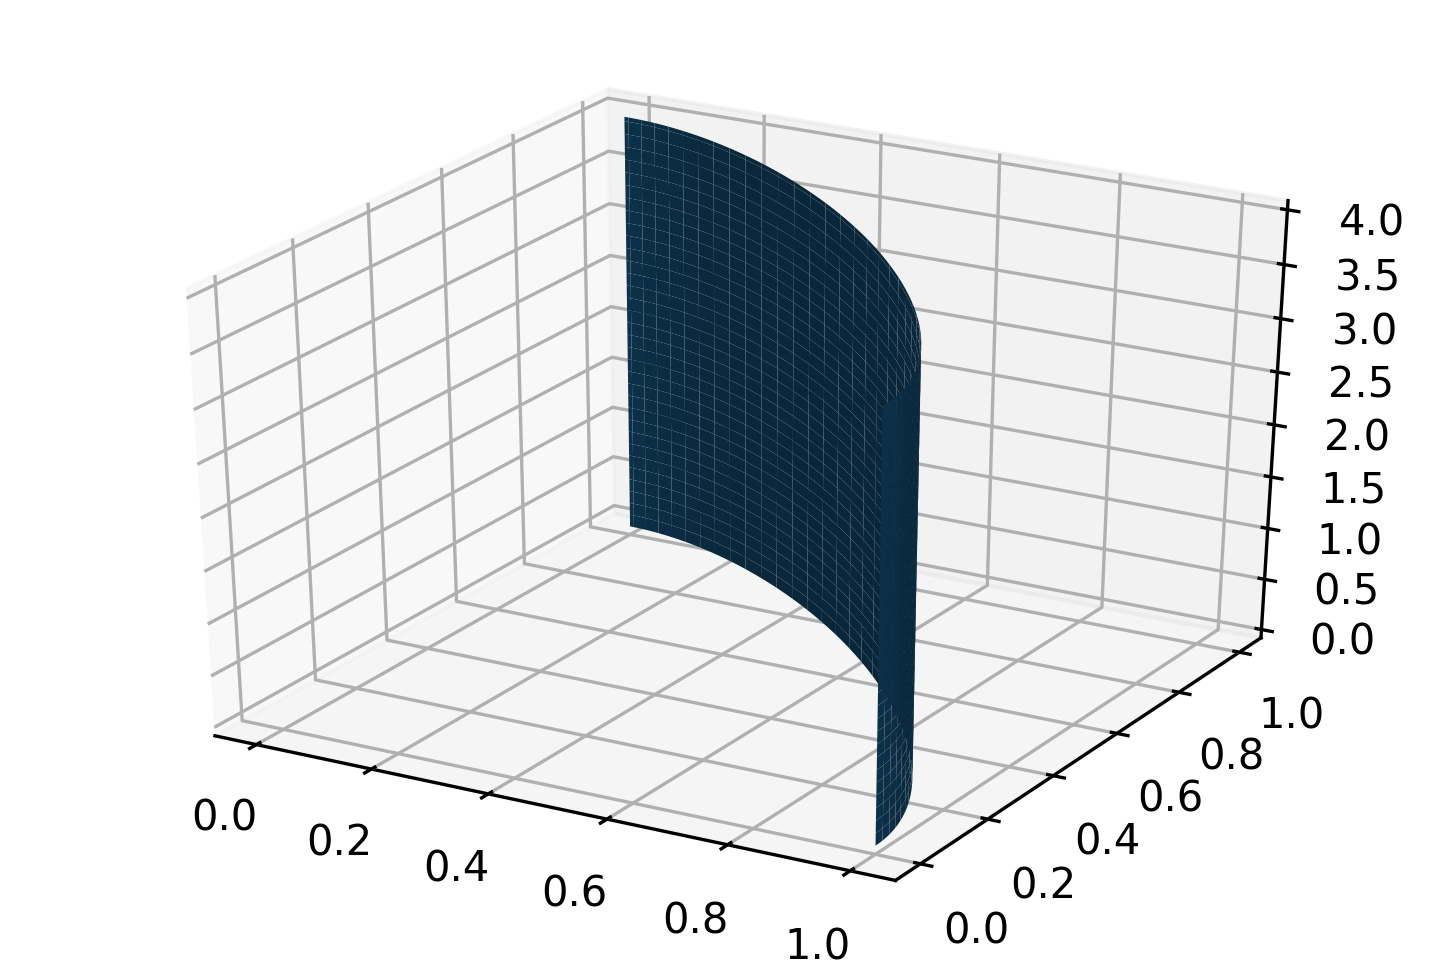

In [5]:
def NSubISub2(i, u):
    if i == 0:
        return (1-u if u >= 0 and u <= 1 else 0)
    elif i == 1:
        return (u if u >= 0 and u <= 1 else 0)
    else:
        raise IndexError(f"i = {i} is not within the bounds of this basis function")
        
def NSubJSub3(j, v):
    if j == 0:
        return ((1-v)**2 if v >= 0 and v <= 1 else 0)
    elif j == 1:
        return (v*(1-v) if v >= 0 and v <= 1 else 0)
    elif j == 2:
        return (v**2 if v >= 0 and v <= 1 else 0)
    else:
        raise IndexError(f"i = {i} is not within the bounds of this basis function")
        
def HSubISubJ(i, j):
    HSubI = [1, 1]
    HSubJ = [1, 1/np.sqrt(2), 1]
    return HSubI[i]*HSubJ[j]

P = np.array([
    [[1, 0, 0], [1, 1, 0], [0, 1, 0]],
    [[1, 0, 4], [1, 1, 4], [0, 1, 4]],
])

def POutFunc(u, v):
    num, den = 0, 0
    for i in range(2):
        for j in range(3):
            num += HSubISubJ(i, j)*P[i, j]*NSubISub2(i, u)*NSubJSub3(j, v)
            den += HSubISubJ(i, j)*NSubISub2(i, u)*NSubJSub3(j, v)
    return num / den

# find point @ u = v = .5
uu, ww = .5, .5
POut = POutFunc(uu, ww)
print(f"P[{uu}, {ww}] = {POut}")
rAct = np.sqrt(POut[0]**2 + POut[1]**2) # hypotenuse of x and y coord is the radius from z-axis
err = 1-rAct/1
print(f"Radius error = {err}")

# U, W
start = 0
stop = 1
step = .01
u = np.arange(start, stop + step, step)
w = u.copy()

POut = np.zeros((len(u), len(w), 3))
for iu, uu in enumerate(u):
    for iw, ww in enumerate(w):
        POut[iu, iw] = POutFunc(uu, ww)
 
# plot surface
fig = plt.figure(3)
ax = plt.axes(projection='3d')
ax.plot_surface(POut[:, :, 0], POut[:, :, 1], POut[:, :, 2])
plt.savefig(f"./problem{fig.number}.png", dpi=300)
plt.show()